# Introduction to Inverse Problems

Consider the integration operator $A:L^2\left(\left[0,1\right]\right)\rightarrow L^2\left(\left[0,1\right]\right)$

$$ (Ax)(t) = \int_0^{t}x(s) ds $$
    
    
    

$A$ is linear and compact, hence  the inverse problem is ill-posed. 

We want to be able to compute the operator numerically. To do this, we will discretize the interval $[0, 1]$ on the grid $s_i = (i-\frac{1}{2})h, \ i=1,2,...,N$  with $h = \frac{1}{N}$. The function $x$ can be approximated by a piecewise constant step
function $\tilde{x}$ with values $x_i = f(s_i)$ on the interval $\left[(i-1)h, ih\right]$.

The function $y = Ax$ can then be approximated by a vector $\tilde{y}=(y_1,y_2, ...,y_N)$ defined as

$$ y_i= (A \tilde{x})(s_i) = \int_0^{s_i}\tilde{x}(s) ds $$






One can prove that $\tilde{y}$ is given by the matrix-vector multiplication $\tilde{y} = \tilde{A}\tilde{x}$ with 

$$\tilde{A}=h \begin{bmatrix}
    \frac{1}{2}  & 0           & 0       & \cdots & 0           & 0          \\
    1            & \frac{1}{2} & 0       & \cdots & 0           & 0          \\
    \vdots       & \vdots      & \vdots  &        & \vdots      & \vdots     \\ 
    1            & 1           & 1       & \cdots & \frac{1}{2} & 0     \\ 
    1            & 1           & 1       & \cdots & 1           & \frac{1}{2}\\
\end{bmatrix}
$$



## Exercise 1 (Operator discretization)
**a)** Compute and plot the above introduced discretization matrix corresponding to the operator $A$. <br> 

**Hint:** Use the function `plt.imshow` to show a matrix as an image.

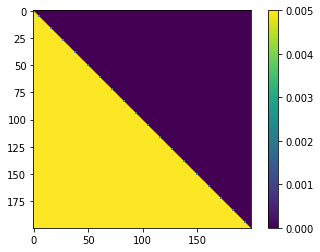

In [1]:
# a) Your code goes here !!!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n = 200
h = 1/n
A = np.zeros(shape=(n, n))

# for i in range(n):
#     A[i,i] = 0.5
#     for j in range(i):
#         A[i,j] = 1

A = h * (np.tril(np.ones(shape=(n, n))) - 0.5 * np.eye(n))

plt.imshow(A)
plt.colorbar()

**b)** Using the above mentioned discretization, compute and plot $x(s) = e^{2s} \cos(5s)$ and $y(t) = (Ax)(t)$.

**Hint:** Use the function `plt.plot` and inlcude the argument `label` for each plot to distingish them. Use the method `plt.legend()` to show the legend.

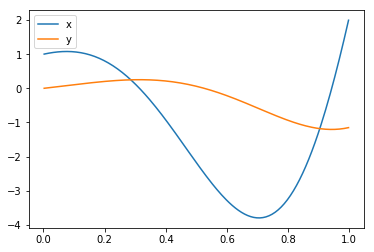

In [2]:
# b) Your code goes here !!!
s = np.arange(h/2, 1, h)
x = np.exp(2*s) * np.cos(5*s)
plt.plot(s, x, label='x')

y = np.dot(A, x)
plt.plot(s, y, label='y')
plt.legend()

## Exercise 2 (Direct Inversion)

Now lets try to reconstruct $x$ from $y$. For that we would need in principle to compute the inverse of the matrix $A$. <br>

**a)** Set $y^\delta = y + \sigma\delta$ with $\delta \sim N(0, \mathbb{1}_n)$ and try to reconstruct $x^\delta = A^{-1} y^\delta$. Set $\sigma=0, 10^{-4}, 10^{-3}, 10^{-2}$ and show $y^\delta$ and $x^\delta$ in different plots (2 columns each).<br>

**Hint:** Use `np.linalg.solve()` for computing $x$ and `np.random.normal()` for the noise

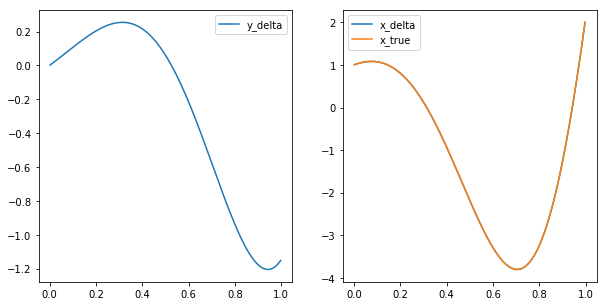

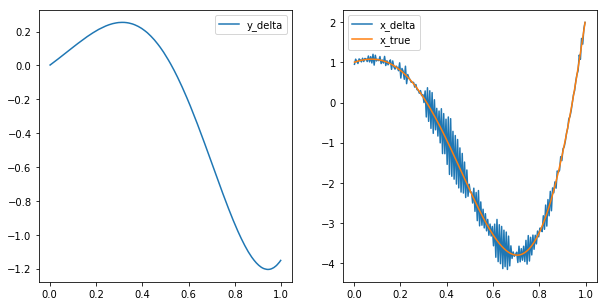

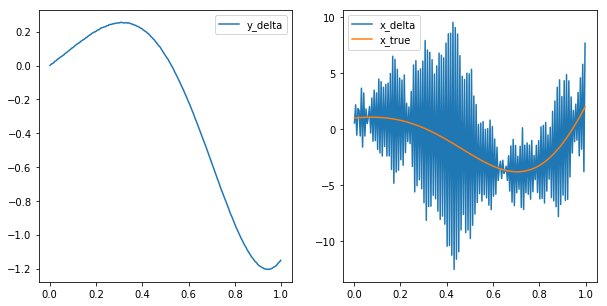

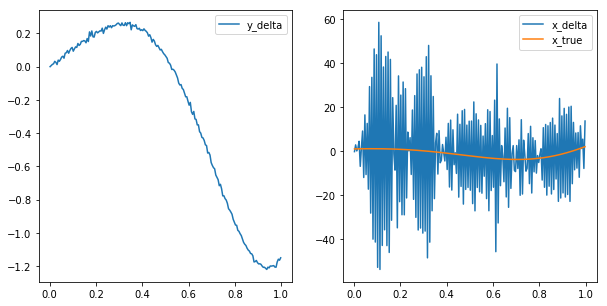

In [3]:
# a) Your code goes here !!!
for sigma in [0, 1e-4, 1e-3, 1e-2]:
    plt.figure(figsize=(10,5))
    y_delta = y + np.random.normal(size=y.shape) * sigma
    x_rec = np.linalg.solve(A, y_delta)
    
    plt.subplot(1, 2, 1)
    plt.plot(s, y_delta, label='y_delta')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(s, x_rec, label='x_delta')
    plt.plot(s, x, label=r'x_true')
    
    plt.legend()

## Exercise 3 (Truncated SVD)

**a)** Compute the SVD of the matrix $A$ and check that indeed $USV^T=A$. <br>

**Hint:** Use the method `np.linalg.svd()` for computing the SVD.

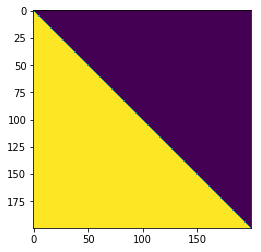

In [4]:
# a) Your code goes here !!!
U, S, V = np.linalg.svd(A)

plt.imshow(np.dot(np.dot(U, np.diag(S)), V))

**b)** Plot the singular values of $A$. <br>

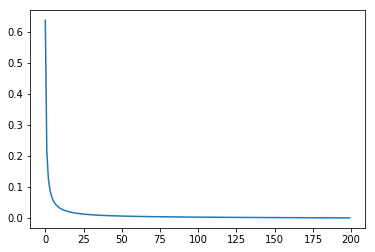

In [5]:
plt.plot(S)

**c)** Implement the truncated SVD and compute the reconstructions for $\sigma=10^{-2}$ and $\gamma=10^{-4},10^{-3},10^{-2},10^{-1}$.

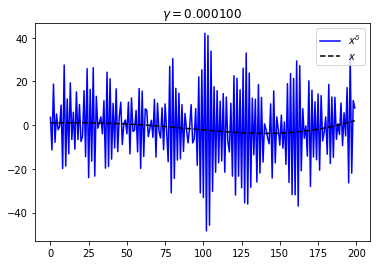

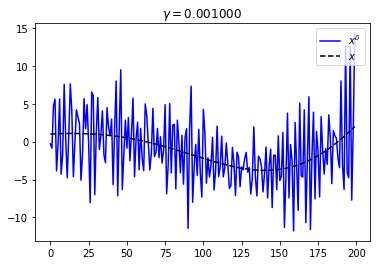

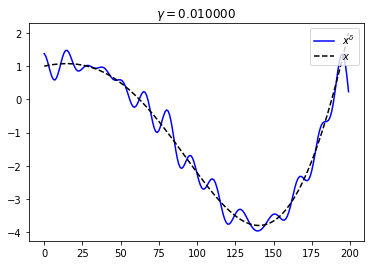

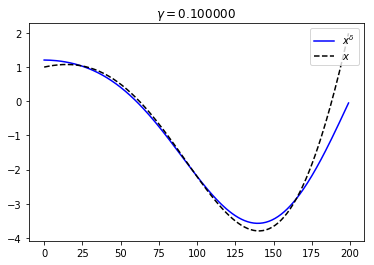

In [6]:
def truncated_svd(U, S, V, y, gamma):
    S_inv = []
    for i in range(len(S)):
        if S[i] > gamma:
            S_inv += [1/S[i]]
        else:
            S_inv += [0]
            
    A_inv = np.dot(np.dot(V.T, np.diag(S_inv)), U.T)
    return np.dot(A_inv, y)


sigma = 1e-2
y_delta = y + np.random.normal(scale=sigma, size=y.shape)
    
for gamma in [1e-4, 1e-3, 1e-2, 1e-1]:
    
    x_delta = truncated_svd(U, S, V, y_delta, gamma)

    plt.title(r'$\gamma=%f$' % gamma)
    plt.plot(x_delta, color='blue', label='$x^\delta$')
    plt.plot(x, color='black', linestyle='--', label='$x$')
    plt.legend(loc='upper right')
    plt.show()

## Exercise 4 (Tikhonov)

Now lets compute the reconstruction using the Tikhonov approach, i.e the reconstruction is computed by
$$x^\delta = (A^TA + \alpha I)^{-1}A^Ty^\delta$$ 

**a)** Implement the Tikhonov method and compute the reconstructions for $\sigma=10^{-2}$ and $\alpha=10^{-4},10^{-3},10^{-2},10^{-1}$.

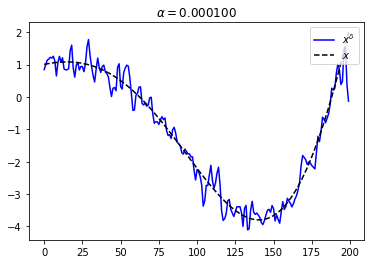

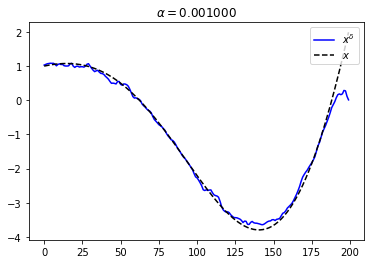

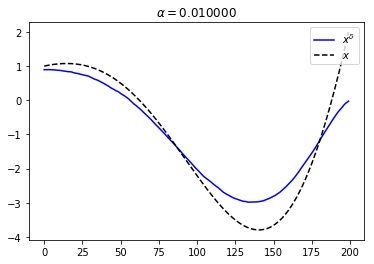

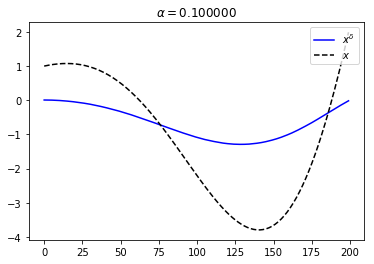

In [8]:
def tikhonov(A, y, alpha):
    W = np.dot(A.T, A) + alpha * np.eye(A.shape[0])
    b = np.dot(A.T, y)
    return np.linalg.solve(W, b)


sigma = 1e-2
y_delta = y + np.random.normal(scale=sigma, size=y.shape)
    
for alpha in [1e-4, 1e-3, 1e-2, 1e-1]:
    
    x_delta = tikhonov(A, y_delta, alpha)

    plt.title(r'$\alpha=%f$' % alpha)
    plt.plot(x_delta, color='blue', label='$x^\delta$')
    plt.plot(x, color='black', linestyle='--', label='$x$')
    plt.legend(loc='upper right')
    plt.show()